In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

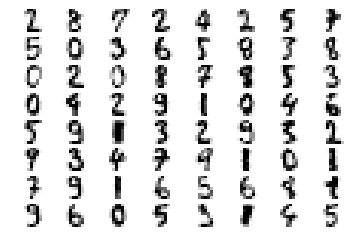

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 6)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T.tolist() 

In [7]:
classes = []
for i in range(2**(10-1) - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/511".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/511
number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.60066 stdev: 0.27126
Best fitness: 0.97712 - size: (2, 13) - species 3 - id 173
Average adjusted fitness: 0.504
Mean genetic distance 2.892, standard deviation 0.482
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 6.489 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.74772 stdev: 0.24106
Best fitness: 0.97712 - size: (2, 13) - species 3 - id 173
Average adjusted fitness: 0.633
Mean genetic distance 2.990, standard deviation 0.473
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 6.023 sec (6.256 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.78600 stdev: 0.21645
Best fitness: 0.97712 - size: (2, 13) - species 24 - id 173
Average adjusted fitness: 0.666
Mean genetic distance 2.993, standard deviation 0.502
Population of 201 members in 30 species

Mean genetic distance 3.183, standard deviation 0.470
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 12.338 sec (11.594 average)
running:4/511
number of class1:322
number of class2:1295

 ****** Running generation 0 ****** 

Population's average fitness: 0.54994 stdev: 0.21310
Best fitness: 0.85096 - size: (2, 13) - species 1 - id 2
Average adjusted fitness: 0.428
Mean genetic distance 2.922, standard deviation 0.482
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 10.120 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.66418 stdev: 0.19017
Best fitness: 0.86333 - size: (3, 14) - species 4 - id 294
Average adjusted fitness: 0.481
Mean genetic distance 3.024, standard deviation 0.486
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 10.371 sec (10.246 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.69850 stdev: 0.17176
Best fitness: 0.88064 - 

Population's average fitness: 0.59671 stdev: 0.08473
Best fitness: 0.79530 - size: (4, 16) - species 29 - id 948
Average adjusted fitness: 0.205
Mean genetic distance 3.129, standard deviation 0.480
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 8.685 sec (9.808 average)
running:8/511
number of class1:325
number of class2:1292

 ****** Running generation 0 ****** 

Population's average fitness: 0.54702 stdev: 0.21364
Best fitness: 0.85405 - size: (2, 13) - species 5 - id 47
Average adjusted fitness: 0.403
Mean genetic distance 2.902, standard deviation 0.469
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 6.886 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67861 stdev: 0.18523
Best fitness: 0.88064 - size: (3, 15) - species 14 - id 284
Average adjusted fitness: 0.511
Mean genetic distance 3.007, standard deviation 0.515
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 

Population's average fitness: 0.60326 stdev: 0.08227
Best fitness: 0.76562 - size: (5, 19) - species 17 - id 746
Average adjusted fitness: 0.267
Mean genetic distance 3.082, standard deviation 0.520
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 11.296 sec (10.619 average)
running:12/511
number of class1:485
number of class2:1132

 ****** Running generation 0 ****** 

Population's average fitness: 0.52330 stdev: 0.15559
Best fitness: 0.81818 - size: (2, 13) - species 3 - id 79
Average adjusted fitness: 0.239
Mean genetic distance 2.882, standard deviation 0.467
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 8.720 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58258 stdev: 0.14714
Best fitness: 0.81818 - size: (2, 13) - species 3 - id 79
Average adjusted fitness: 0.294
Mean genetic distance 3.001, standard deviation 0.468
Population of 199 members in 31 species
Total extinctions: 0
Generation time:

Population's average fitness: 0.56309 stdev: 0.06656
Best fitness: 0.69821 - size: (3, 13) - species 21 - id 808
Average adjusted fitness: 0.191
Mean genetic distance 2.989, standard deviation 0.500
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 17.050 sec (16.467 average)
running:16/511
number of class1:326
number of class2:1291

 ****** Running generation 0 ****** 

Population's average fitness: 0.54507 stdev: 0.21042
Best fitness: 0.87755 - size: (2, 13) - species 2 - id 198
Average adjusted fitness: 0.387
Mean genetic distance 2.952, standard deviation 0.496
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 13.834 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67903 stdev: 0.17182
Best fitness: 0.88497 - size: (3, 15) - species 24 - id 373
Average adjusted fitness: 0.476
Mean genetic distance 2.959, standard deviation 0.480
Population of 201 members in 30 species
Total extinctions: 0
Generation t

Mean genetic distance 3.078, standard deviation 0.502
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 21.374 sec (20.143 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60776 stdev: 0.08161
Best fitness: 0.79777 - size: (3, 14) - species 14 - id 356
Average adjusted fitness: 0.218
Mean genetic distance 3.078, standard deviation 0.519
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 31.135 sec (21.975 average)
running:20/511
number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.55183 stdev: 0.14938
Best fitness: 0.76871 - size: (2, 13) - species 2 - id 49
Average adjusted fitness: 0.266
Mean genetic distance 2.987, standard deviation 0.523
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 22.681 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60042 stdev: 0.14199
Best fitness: 0.78726

Population's average fitness: 0.56032 stdev: 0.07699
Best fitness: 0.75201 - size: (5, 19) - species 28 - id 783
Average adjusted fitness: 0.158
Mean genetic distance 3.133, standard deviation 0.478
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 32.006 sec (23.300 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56601 stdev: 0.07755
Best fitness: 0.75201 - size: (5, 19) - species 28 - id 783
Average adjusted fitness: 0.182
Mean genetic distance 3.126, standard deviation 0.483
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 21.953 sec (23.075 average)
running:24/511
number of class1:489
number of class2:1128

 ****** Running generation 0 ****** 

Population's average fitness: 0.54794 stdev: 0.15407
Best fitness: 0.81076 - size: (2, 13) - species 2 - id 38
Average adjusted fitness: 0.317
Mean genetic distance 2.878, standard deviation 0.449
Population of 200 members in 22 species
Total extinctions

Mean genetic distance 3.086, standard deviation 0.500
Population of 207 members in 32 species
Total extinctions: 0
Generation time: 20.760 sec (19.439 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57107 stdev: 0.08310
Best fitness: 0.76933 - size: (4, 17) - species 4 - id 823
Average adjusted fitness: 0.211
Mean genetic distance 3.111, standard deviation 0.501
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 21.426 sec (19.836 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58325 stdev: 0.08109
Best fitness: 0.76933 - size: (4, 17) - species 4 - id 823
Average adjusted fitness: 0.197
Mean genetic distance 3.110, standard deviation 0.482
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 21.701 sec (20.147 average)
running:28/511
number of class1:649
number of class2:968

 ****** Running generation 0 ****** 

Population's average fitness: 0.53063 stdev: 0.08935
Best 

Population's average fitness: 0.58618 stdev: 0.09001
Best fitness: 0.75510 - size: (3, 14) - species 6 - id 300
Average adjusted fitness: 0.213
Mean genetic distance 3.085, standard deviation 0.489
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 21.053 sec (19.568 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57872 stdev: 0.09593
Best fitness: 0.75510 - size: (3, 14) - species 19 - id 300
Average adjusted fitness: 0.228
Mean genetic distance 3.155, standard deviation 0.475
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 21.431 sec (19.941 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58200 stdev: 0.09930
Best fitness: 0.75510 - size: (3, 14) - species 19 - id 300
Average adjusted fitness: 0.242
Mean genetic distance 3.140, standard deviation 0.486
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 21.727 sec (20.239 average)
running:

Mean genetic distance 2.986, standard deviation 0.480
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 19.903 sec (19.283 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59387 stdev: 0.08547
Best fitness: 0.76994 - size: (3, 15) - species 10 - id 657
Average adjusted fitness: 0.227
Mean genetic distance 3.080, standard deviation 0.487
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 21.078 sec (19.732 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60871 stdev: 0.08206
Best fitness: 0.78355 - size: (4, 17) - species 10 - id 823
Average adjusted fitness: 0.221
Mean genetic distance 3.072, standard deviation 0.493
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 21.392 sec (20.064 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61920 stdev: 0.08208
Best fitness: 0.78355 - size: (4, 17) - species 10 - id 823


Population's average fitness: 0.55460 stdev: 0.07515
Best fitness: 0.76005 - size: (3, 17) - species 18 - id 466
Average adjusted fitness: 0.269
Mean genetic distance 3.056, standard deviation 0.506
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 19.897 sec (19.062 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56678 stdev: 0.07902
Best fitness: 0.76005 - size: (3, 17) - species 18 - id 466
Average adjusted fitness: 0.207
Mean genetic distance 3.111, standard deviation 0.499
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 20.692 sec (19.469 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58021 stdev: 0.08047
Best fitness: 0.76994 - size: (3, 14) - species 26 - id 758
Average adjusted fitness: 0.235
Mean genetic distance 3.105, standard deviation 0.494
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 20.285 sec (19.632 average)

 *****

Mean genetic distance 3.026, standard deviation 0.502
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 19.518 sec (18.771 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55021 stdev: 0.07875
Best fitness: 0.74583 - size: (3, 15) - species 16 - id 512
Average adjusted fitness: 0.178
Mean genetic distance 3.045, standard deviation 0.497
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 19.931 sec (19.158 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56791 stdev: 0.08590
Best fitness: 0.74583 - size: (3, 15) - species 15 - id 512
Average adjusted fitness: 0.222
Mean genetic distance 3.119, standard deviation 0.515
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 20.299 sec (19.443 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57953 stdev: 0.08670
Best fitness: 0.77304 - size: (3, 14) - species 29 - id 768


Population's average fitness: 0.53526 stdev: 0.09309
Best fitness: 0.72171 - size: (3, 14) - species 8 - id 293
Average adjusted fitness: 0.265
Mean genetic distance 3.008, standard deviation 0.477
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 19.265 sec (18.450 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55569 stdev: 0.09666
Best fitness: 0.72171 - size: (3, 14) - species 16 - id 293
Average adjusted fitness: 0.233
Mean genetic distance 3.093, standard deviation 0.484
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 19.849 sec (18.917 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56799 stdev: 0.09996
Best fitness: 0.74954 - size: (2, 14) - species 19 - id 655
Average adjusted fitness: 0.294
Mean genetic distance 3.067, standard deviation 0.491
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 20.952 sec (19.425 average)

 ******

Mean genetic distance 2.941, standard deviation 0.471
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 17.901 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52085 stdev: 0.06238
Best fitness: 0.72047 - size: (3, 14) - species 27 - id 362
Average adjusted fitness: 0.168
Mean genetic distance 3.014, standard deviation 0.472
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 18.980 sec (18.441 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53566 stdev: 0.07037
Best fitness: 0.72047 - size: (3, 14) - species 4 - id 362
Average adjusted fitness: 0.204
Mean genetic distance 3.042, standard deviation 0.484
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 20.362 sec (19.081 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54406 stdev: 0.07218
Best fitness: 0.76190 - size: (4, 16) - species 4 - id 648
Average adjusted fi


 ****** Running generation 0 ****** 

Population's average fitness: 0.46703 stdev: 0.08905
Best fitness: 0.73531 - size: (2, 13) - species 1 - id 60
Average adjusted fitness: 0.193
Mean genetic distance 2.842, standard deviation 0.484
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 18.173 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53124 stdev: 0.09154
Best fitness: 0.76067 - size: (3, 15) - species 16 - id 365
Average adjusted fitness: 0.235
Mean genetic distance 2.955, standard deviation 0.501
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 19.156 sec (18.665 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55494 stdev: 0.10142
Best fitness: 0.76067 - size: (3, 15) - species 16 - id 365
Average adjusted fitness: 0.245
Mean genetic distance 3.049, standard deviation 0.502
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 20.028 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47835 stdev: 0.09919
Best fitness: 0.71058 - size: (2, 13) - species 4 - id 89
Average adjusted fitness: 0.221
Mean genetic distance 2.932, standard deviation 0.469
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 17.954 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52738 stdev: 0.10742
Best fitness: 0.76500 - size: (3, 14) - species 1 - id 327
Average adjusted fitness: 0.329
Mean genetic distance 3.032, standard deviation 0.458
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 19.648 sec (18.801 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56812 stdev: 0.10377
Best fitness: 0.77427 - size: (3, 16) - species 10 - id 522
Average adjusted fitness: 0.292
Mean genetic distance 3.063, standard deviation 0.479
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 20.155 sec (19.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.45717 stdev: 0.15362
Best fitness: 0.77427 - size: (2, 13) - species 1 - id 101
Average adjusted fitness: 0.270
Mean genetic distance 2.873, standard deviation 0.479
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 18.825 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55532 stdev: 0.15580
Best fitness: 0.84230 - size: (2, 14) - species 25 - id 362
Average adjusted fitness: 0.359
Mean genetic distance 2.969, standard deviation 0.486
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 18.919 sec (18.872 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59735 stdev: 0.15443
Best fitness: 0.85714 - size: (4, 18) - species 1 - id 515
Average adjusted fitness: 0.396
Mean genetic distance 2.974, standard deviation 0.475
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 20.269 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.52490 stdev: 0.09743
Best fitness: 0.76129 - size: (2, 13) - species 1 - id 192
Average adjusted fitness: 0.296
Mean genetic distance 2.817, standard deviation 0.478
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 20.321 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55884 stdev: 0.09423
Best fitness: 0.76129 - size: (2, 13) - species 1 - id 192
Average adjusted fitness: 0.297
Mean genetic distance 2.970, standard deviation 0.497
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 19.250 sec (19.786 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57741 stdev: 0.08982
Best fitness: 0.76129 - size: (2, 13) - species 1 - id 192
Average adjusted fitness: 0.279
Mean genetic distance 2.995, standard deviation 0.523
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 20.223 sec (19.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.49437 stdev: 0.06861
Best fitness: 0.67038 - size: (2, 13) - species 4 - id 96
Average adjusted fitness: 0.206
Mean genetic distance 2.773, standard deviation 0.428
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 18.487 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53885 stdev: 0.07339
Best fitness: 0.78169 - size: (3, 14) - species 2 - id 334
Average adjusted fitness: 0.164
Mean genetic distance 2.930, standard deviation 0.472
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 19.126 sec (18.807 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55326 stdev: 0.08204
Best fitness: 0.78417 - size: (4, 17) - species 2 - id 543
Average adjusted fitness: 0.188
Mean genetic distance 3.040, standard deviation 0.488
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 20.802 sec (19.47


 ****** Running generation 0 ****** 

Population's average fitness: 0.50772 stdev: 0.06615
Best fitness: 0.72913 - size: (2, 13) - species 8 - id 169
Average adjusted fitness: 0.281
Mean genetic distance 2.932, standard deviation 0.491
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 18.345 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53816 stdev: 0.07922
Best fitness: 0.72913 - size: (2, 13) - species 8 - id 169
Average adjusted fitness: 0.267
Mean genetic distance 3.002, standard deviation 0.482
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 19.555 sec (18.950 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56450 stdev: 0.07845
Best fitness: 0.74212 - size: (4, 16) - species 22 - id 499
Average adjusted fitness: 0.183
Mean genetic distance 3.000, standard deviation 0.499
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 20.675 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48458 stdev: 0.09797
Best fitness: 0.76252 - size: (2, 13) - species 2 - id 25
Average adjusted fitness: 0.198
Mean genetic distance 2.867, standard deviation 0.467
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 18.819 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54842 stdev: 0.09540
Best fitness: 0.76252 - size: (2, 13) - species 2 - id 25
Average adjusted fitness: 0.175
Mean genetic distance 3.019, standard deviation 0.467
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 19.662 sec (19.240 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57378 stdev: 0.09163
Best fitness: 0.76252 - size: (2, 13) - species 3 - id 25
Average adjusted fitness: 0.250
Mean genetic distance 3.097, standard deviation 0.477
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 20.590 sec (19.690 


 ****** Running generation 0 ****** 

Population's average fitness: 0.50895 stdev: 0.06987
Best fitness: 0.74397 - size: (2, 13) - species 3 - id 112
Average adjusted fitness: 0.251
Mean genetic distance 2.871, standard deviation 0.442
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 18.594 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53694 stdev: 0.08848
Best fitness: 0.76438 - size: (2, 13) - species 11 - id 236
Average adjusted fitness: 0.267
Mean genetic distance 2.999, standard deviation 0.466
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 19.597 sec (19.096 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55375 stdev: 0.09305
Best fitness: 0.79159 - size: (4, 17) - species 26 - id 529
Average adjusted fitness: 0.232
Mean genetic distance 3.052, standard deviation 0.463
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 20.189 sec (19


 ****** Running generation 0 ****** 

Population's average fitness: 0.48127 stdev: 0.10428
Best fitness: 0.75325 - size: (2, 13) - species 3 - id 180
Average adjusted fitness: 0.239
Mean genetic distance 2.914, standard deviation 0.481
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 18.540 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54582 stdev: 0.11107
Best fitness: 0.77737 - size: (3, 15) - species 3 - id 362
Average adjusted fitness: 0.257
Mean genetic distance 3.064, standard deviation 0.477
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 20.690 sec (19.615 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58753 stdev: 0.10196
Best fitness: 0.80767 - size: (3, 13) - species 9 - id 418
Average adjusted fitness: 0.311
Mean genetic distance 3.088, standard deviation 0.469
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 21.345 sec (20.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.48609 stdev: 0.10132
Best fitness: 0.73346 - size: (2, 13) - species 1 - id 54
Average adjusted fitness: 0.215
Mean genetic distance 2.890, standard deviation 0.480
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 18.586 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54206 stdev: 0.11234
Best fitness: 0.73346 - size: (2, 13) - species 1 - id 54
Average adjusted fitness: 0.249
Mean genetic distance 2.989, standard deviation 0.503
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 19.782 sec (19.184 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55998 stdev: 0.11330
Best fitness: 0.77984 - size: (3, 16) - species 16 - id 414
Average adjusted fitness: 0.260
Mean genetic distance 3.025, standard deviation 0.497
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 20.461 sec (19.61


 ****** Running generation 0 ****** 

Population's average fitness: 0.45573 stdev: 0.14626
Best fitness: 0.75077 - size: (2, 13) - species 6 - id 63
Average adjusted fitness: 0.205
Mean genetic distance 2.883, standard deviation 0.490
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 19.256 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55639 stdev: 0.15590
Best fitness: 0.78231 - size: (3, 15) - species 7 - id 262
Average adjusted fitness: 0.332
Mean genetic distance 3.006, standard deviation 0.498
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 20.458 sec (19.857 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60401 stdev: 0.14086
Best fitness: 0.78231 - size: (3, 15) - species 7 - id 262
Average adjusted fitness: 0.341
Mean genetic distance 3.030, standard deviation 0.517
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 21.351 sec (20.35


 ****** Running generation 0 ****** 

Population's average fitness: 0.49110 stdev: 0.06508
Best fitness: 0.69759 - size: (2, 13) - species 5 - id 137
Average adjusted fitness: 0.202
Mean genetic distance 2.899, standard deviation 0.463
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 18.021 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53294 stdev: 0.06189
Best fitness: 0.69759 - size: (2, 13) - species 5 - id 137
Average adjusted fitness: 0.212
Mean genetic distance 3.008, standard deviation 0.462
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 19.714 sec (18.868 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55077 stdev: 0.06668
Best fitness: 0.74521 - size: (3, 16) - species 8 - id 526
Average adjusted fitness: 0.158
Mean genetic distance 3.084, standard deviation 0.472
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 21.291 sec (19.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.47536 stdev: 0.09306
Best fitness: 0.68831 - size: (2, 13) - species 1 - id 98
Average adjusted fitness: 0.261
Mean genetic distance 2.875, standard deviation 0.498
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 18.234 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53613 stdev: 0.09451
Best fitness: 0.76747 - size: (2, 13) - species 13 - id 274
Average adjusted fitness: 0.327
Mean genetic distance 3.013, standard deviation 0.478
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 20.047 sec (19.141 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56206 stdev: 0.09581
Best fitness: 0.76747 - size: (2, 13) - species 13 - id 274
Average adjusted fitness: 0.293
Mean genetic distance 3.068, standard deviation 0.476
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 20.909 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48558 stdev: 0.10282
Best fitness: 0.74954 - size: (2, 13) - species 4 - id 35
Average adjusted fitness: 0.202
Mean genetic distance 2.932, standard deviation 0.502
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 18.416 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54464 stdev: 0.10269
Best fitness: 0.75572 - size: (2, 14) - species 6 - id 360
Average adjusted fitness: 0.210
Mean genetic distance 2.978, standard deviation 0.492
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 19.924 sec (19.170 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56916 stdev: 0.10324
Best fitness: 0.76252 - size: (3, 14) - species 20 - id 466
Average adjusted fitness: 0.240
Mean genetic distance 3.026, standard deviation 0.490
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 20.750 sec (19.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.45976 stdev: 0.15248
Best fitness: 0.76747 - size: (2, 13) - species 3 - id 136
Average adjusted fitness: 0.255
Mean genetic distance 2.966, standard deviation 0.484
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 18.586 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56384 stdev: 0.14822
Best fitness: 0.76747 - size: (2, 13) - species 3 - id 136
Average adjusted fitness: 0.332
Mean genetic distance 3.089, standard deviation 0.508
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 19.847 sec (19.216 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59339 stdev: 0.14446
Best fitness: 0.80643 - size: (3, 14) - species 3 - id 526
Average adjusted fitness: 0.262
Mean genetic distance 3.099, standard deviation 0.537
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 20.714 sec (19.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.48289 stdev: 0.09383
Best fitness: 0.71119 - size: (2, 13) - species 2 - id 158
Average adjusted fitness: 0.252
Mean genetic distance 2.878, standard deviation 0.489
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 19.130 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55033 stdev: 0.09324
Best fitness: 0.72975 - size: (3, 14) - species 3 - id 325
Average adjusted fitness: 0.211
Mean genetic distance 3.004, standard deviation 0.517
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 19.870 sec (19.500 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56536 stdev: 0.10734
Best fitness: 0.76438 - size: (4, 16) - species 3 - id 516
Average adjusted fitness: 0.208
Mean genetic distance 3.101, standard deviation 0.488
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 21.211 sec (20.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.44990 stdev: 0.15203
Best fitness: 0.72356 - size: (2, 13) - species 4 - id 115
Average adjusted fitness: 0.308
Mean genetic distance 2.829, standard deviation 0.483
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 18.418 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54122 stdev: 0.15747
Best fitness: 0.76129 - size: (2, 13) - species 11 - id 288
Average adjusted fitness: 0.363
Mean genetic distance 2.952, standard deviation 0.497
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 20.164 sec (19.291 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59799 stdev: 0.14027
Best fitness: 0.76129 - size: (2, 13) - species 11 - id 288
Average adjusted fitness: 0.312
Mean genetic distance 3.023, standard deviation 0.474
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 20.562 sec (19


 ****** Running generation 0 ****** 

Population's average fitness: 0.46416 stdev: 0.16082
Best fitness: 0.80767 - size: (2, 13) - species 4 - id 121
Average adjusted fitness: 0.254
Mean genetic distance 2.972, standard deviation 0.485
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 18.323 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57050 stdev: 0.15473
Best fitness: 0.85034 - size: (2, 14) - species 4 - id 365
Average adjusted fitness: 0.337
Mean genetic distance 3.029, standard deviation 0.497
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 20.010 sec (19.166 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60617 stdev: 0.14573
Best fitness: 0.85034 - size: (2, 14) - species 4 - id 365
Average adjusted fitness: 0.375
Mean genetic distance 3.059, standard deviation 0.489
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 20.892 sec (19.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.46472 stdev: 0.21898
Best fitness: 0.81880 - size: (2, 13) - species 2 - id 93
Average adjusted fitness: 0.367
Mean genetic distance 2.821, standard deviation 0.469
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 18.617 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61948 stdev: 0.20085
Best fitness: 0.82993 - size: (2, 13) - species 9 - id 246
Average adjusted fitness: 0.455
Mean genetic distance 2.910, standard deviation 0.495
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 20.160 sec (19.389 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65662 stdev: 0.19500
Best fitness: 0.85220 - size: (3, 15) - species 8 - id 464
Average adjusted fitness: 0.496
Mean genetic distance 2.912, standard deviation 0.488
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 20.833 sec (19.87


 ****** Running generation 0 ****** 

Population's average fitness: 0.52107 stdev: 0.09205
Best fitness: 0.70501 - size: (2, 13) - species 1 - id 27
Average adjusted fitness: 0.174
Mean genetic distance 2.958, standard deviation 0.490
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 18.912 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56389 stdev: 0.08562
Best fitness: 0.74768 - size: (3, 15) - species 1 - id 350
Average adjusted fitness: 0.238
Mean genetic distance 3.010, standard deviation 0.483
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 20.131 sec (19.522 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58730 stdev: 0.08200
Best fitness: 0.74892 - size: (4, 17) - species 3 - id 426
Average adjusted fitness: 0.213
Mean genetic distance 3.026, standard deviation 0.505
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 20.493 sec (19.84


 ****** Running generation 0 ****** 

Population's average fitness: 0.51293 stdev: 0.05654
Best fitness: 0.70377 - size: (2, 13) - species 1 - id 191
Average adjusted fitness: 0.129
Mean genetic distance 2.906, standard deviation 0.519
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 18.715 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52704 stdev: 0.07024
Best fitness: 0.71305 - size: (3, 15) - species 3 - id 314
Average adjusted fitness: 0.227
Mean genetic distance 2.949, standard deviation 0.536
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 20.962 sec (19.839 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53889 stdev: 0.07554
Best fitness: 0.71985 - size: (3, 15) - species 2 - id 488
Average adjusted fitness: 0.273
Mean genetic distance 3.032, standard deviation 0.528
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 20.129 sec (19.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.50173 stdev: 0.06468
Best fitness: 0.73655 - size: (2, 13) - species 1 - id 21
Average adjusted fitness: 0.232
Mean genetic distance 2.861, standard deviation 0.434
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 19.153 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54609 stdev: 0.06956
Best fitness: 0.74088 - size: (3, 14) - species 11 - id 278
Average adjusted fitness: 0.172
Mean genetic distance 2.914, standard deviation 0.455
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 20.499 sec (19.826 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55782 stdev: 0.07087
Best fitness: 0.75819 - size: (3, 15) - species 1 - id 535
Average adjusted fitness: 0.140
Mean genetic distance 2.932, standard deviation 0.475
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 20.135 sec (19.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.47638 stdev: 0.08204
Best fitness: 0.66852 - size: (2, 13) - species 1 - id 100
Average adjusted fitness: 0.138
Mean genetic distance 2.849, standard deviation 0.449
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 18.676 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53526 stdev: 0.08712
Best fitness: 0.70996 - size: (2, 13) - species 6 - id 280
Average adjusted fitness: 0.215
Mean genetic distance 2.940, standard deviation 0.481
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 19.780 sec (19.228 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55641 stdev: 0.08876
Best fitness: 0.71243 - size: (3, 16) - species 16 - id 527
Average adjusted fitness: 0.221
Mean genetic distance 3.001, standard deviation 0.506
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 21.085 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49893 stdev: 0.06431
Best fitness: 0.70872 - size: (2, 13) - species 1 - id 184
Average adjusted fitness: 0.213
Mean genetic distance 2.913, standard deviation 0.515
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 19.691 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52447 stdev: 0.06806
Best fitness: 0.75758 - size: (3, 13) - species 9 - id 204
Average adjusted fitness: 0.260
Mean genetic distance 3.009, standard deviation 0.512
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 20.034 sec (19.862 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54432 stdev: 0.06831
Best fitness: 0.75758 - size: (3, 13) - species 9 - id 204
Average adjusted fitness: 0.192
Mean genetic distance 3.076, standard deviation 0.511
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 20.738 sec (20.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.49541 stdev: 0.09618
Best fitness: 0.75263 - size: (2, 13) - species 4 - id 182
Average adjusted fitness: 0.215
Mean genetic distance 2.896, standard deviation 0.446
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 19.250 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54402 stdev: 0.09657
Best fitness: 0.75263 - size: (2, 13) - species 4 - id 182
Average adjusted fitness: 0.211
Mean genetic distance 2.965, standard deviation 0.472
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 19.856 sec (19.553 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55215 stdev: 0.10119
Best fitness: 0.75263 - size: (2, 13) - species 4 - id 182
Average adjusted fitness: 0.208
Mean genetic distance 2.983, standard deviation 0.486
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 21.113 sec (20.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.46635 stdev: 0.09261
Best fitness: 0.70377 - size: (2, 13) - species 3 - id 7
Average adjusted fitness: 0.207
Mean genetic distance 2.902, standard deviation 0.452
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 18.858 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53598 stdev: 0.08703
Best fitness: 0.70377 - size: (2, 13) - species 3 - id 7
Average adjusted fitness: 0.256
Mean genetic distance 2.942, standard deviation 0.463
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 21.336 sec (20.097 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56439 stdev: 0.08730
Best fitness: 0.70377 - size: (2, 13) - species 3 - id 7
Average adjusted fitness: 0.196
Mean genetic distance 3.002, standard deviation 0.477
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 21.886 sec (20.693 ave


 ****** Running generation 0 ****** 

Population's average fitness: 0.48053 stdev: 0.14944
Best fitness: 0.75572 - size: (2, 13) - species 1 - id 128
Average adjusted fitness: 0.265
Mean genetic distance 2.831, standard deviation 0.480
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 18.971 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57001 stdev: 0.14309
Best fitness: 0.78664 - size: (2, 14) - species 7 - id 306
Average adjusted fitness: 0.315
Mean genetic distance 2.969, standard deviation 0.467
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 20.413 sec (19.692 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60138 stdev: 0.13585
Best fitness: 0.80519 - size: (3, 15) - species 2 - id 466
Average adjusted fitness: 0.328
Mean genetic distance 3.056, standard deviation 0.484
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 20.760 sec (20.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.50375 stdev: 0.04619
Best fitness: 0.62832 - size: (2, 13) - species 3 - id 116
Average adjusted fitness: 0.175
Mean genetic distance 2.915, standard deviation 0.533
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 18.735 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52202 stdev: 0.04885
Best fitness: 0.64069 - size: (3, 15) - species 17 - id 377
Average adjusted fitness: 0.142
Mean genetic distance 3.030, standard deviation 0.499
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 19.985 sec (19.360 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53071 stdev: 0.05395
Best fitness: 0.66914 - size: (3, 15) - species 14 - id 442
Average adjusted fitness: 0.120
Mean genetic distance 3.087, standard deviation 0.479
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 21.059 sec (19

Mean genetic distance 3.137, standard deviation 0.522
Population of 208 members in 44 species
Total extinctions: 0
Generation time: 23.044 sec (21.375 average)
running:167/511
number of class1:962
number of class2:655

 ****** Running generation 0 ****** 

Population's average fitness: 0.47773 stdev: 0.08269
Best fitness: 0.72480 - size: (2, 13) - species 3 - id 176
Average adjusted fitness: 0.170
Mean genetic distance 2.941, standard deviation 0.479
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 19.350 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53072 stdev: 0.08352
Best fitness: 0.72480 - size: (2, 13) - species 3 - id 176
Average adjusted fitness: 0.284
Mean genetic distance 3.031, standard deviation 0.491
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 19.723 sec (19.537 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54958 stdev: 0.08254
Best fitness: 0.74150

Population's average fitness: 0.60740 stdev: 0.09735
Best fitness: 0.81385 - size: (2, 14) - species 19 - id 370
Average adjusted fitness: 0.288
Mean genetic distance 3.227, standard deviation 0.494
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 23.297 sec (21.342 average)
running:171/511
number of class1:965
number of class2:652

 ****** Running generation 0 ****** 

Population's average fitness: 0.48186 stdev: 0.09362
Best fitness: 0.70996 - size: (2, 13) - species 2 - id 196
Average adjusted fitness: 0.191
Mean genetic distance 2.960, standard deviation 0.526
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 18.867 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53724 stdev: 0.09549
Best fitness: 0.72233 - size: (2, 13) - species 8 - id 243
Average adjusted fitness: 0.209
Mean genetic distance 3.070, standard deviation 0.540
Population of 201 members in 27 species
Total extinctions: 0
Generation ti

Mean genetic distance 3.106, standard deviation 0.507
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 21.759 sec (20.813 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60533 stdev: 0.09075
Best fitness: 0.78541 - size: (6, 21) - species 20 - id 933
Average adjusted fitness: 0.207
Mean genetic distance 3.163, standard deviation 0.504
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 22.027 sec (21.016 average)
running:175/511
number of class1:1125
number of class2:492

 ****** Running generation 0 ****** 

Population's average fitness: 0.46438 stdev: 0.14091
Best fitness: 0.71861 - size: (2, 13) - species 2 - id 105
Average adjusted fitness: 0.235
Mean genetic distance 2.909, standard deviation 0.481
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 18.998 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55104 stdev: 0.15061
Best fitness: 0.737

Population's average fitness: 0.54725 stdev: 0.05712
Best fitness: 0.68707 - size: (3, 16) - species 27 - id 378
Average adjusted fitness: 0.150
Mean genetic distance 3.099, standard deviation 0.503
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 23.842 sec (21.405 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55406 stdev: 0.05907
Best fitness: 0.68707 - size: (3, 16) - species 27 - id 378
Average adjusted fitness: 0.194
Mean genetic distance 3.055, standard deviation 0.512
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 23.439 sec (21.744 average)
running:179/511
number of class1:966
number of class2:651

 ****** Running generation 0 ****** 

Population's average fitness: 0.47643 stdev: 0.08804
Best fitness: 0.70192 - size: (2, 13) - species 2 - id 91
Average adjusted fitness: 0.164
Mean genetic distance 2.835, standard deviation 0.465
Population of 201 members in 17 species
Total extinctions

Mean genetic distance 2.911, standard deviation 0.461
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 20.682 sec (19.792 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57803 stdev: 0.09172
Best fitness: 0.75634 - size: (4, 17) - species 13 - id 435
Average adjusted fitness: 0.173
Mean genetic distance 2.942, standard deviation 0.474
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 21.080 sec (20.050 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59665 stdev: 0.08697
Best fitness: 0.75696 - size: (4, 17) - species 7 - id 978
Average adjusted fitness: 0.247
Mean genetic distance 2.941, standard deviation 0.458
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 22.482 sec (20.455 average)
running:183/511
number of class1:1126
number of class2:491

 ****** Running generation 0 ****** 

Population's average fitness: 0.46065 stdev: 0.13779
Be

Population's average fitness: 0.58271 stdev: 0.09391
Best fitness: 0.76438 - size: (2, 13) - species 25 - id 45
Average adjusted fitness: 0.285
Mean genetic distance 3.046, standard deviation 0.486
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 21.852 sec (20.468 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59340 stdev: 0.10486
Best fitness: 0.77365 - size: (4, 17) - species 31 - id 761
Average adjusted fitness: 0.296
Mean genetic distance 3.060, standard deviation 0.492
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 22.201 sec (20.814 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59674 stdev: 0.09353
Best fitness: 0.77365 - size: (4, 17) - species 31 - id 761
Average adjusted fitness: 0.245
Mean genetic distance 3.108, standard deviation 0.496
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 23.108 sec (21.197 average)
running:

Mean genetic distance 3.026, standard deviation 0.531
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 21.288 sec (20.006 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60155 stdev: 0.13671
Best fitness: 0.78417 - size: (4, 16) - species 21 - id 520
Average adjusted fitness: 0.319
Mean genetic distance 3.090, standard deviation 0.502
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 22.032 sec (20.513 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62708 stdev: 0.12549
Best fitness: 0.78417 - size: (4, 16) - species 28 - id 520
Average adjusted fitness: 0.333
Mean genetic distance 3.128, standard deviation 0.499
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 22.121 sec (20.834 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62382 stdev: 0.12750
Best fitness: 0.80458 - size: (3, 17) - species 2 - id 963
A

Population's average fitness: 0.58142 stdev: 0.09175
Best fitness: 0.75819 - size: (3, 15) - species 3 - id 515
Average adjusted fitness: 0.256
Mean genetic distance 3.021, standard deviation 0.478
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 20.781 sec (19.905 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59235 stdev: 0.09550
Best fitness: 0.76005 - size: (4, 17) - species 28 - id 680
Average adjusted fitness: 0.268
Mean genetic distance 3.019, standard deviation 0.476
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 21.049 sec (20.191 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59235 stdev: 0.08989
Best fitness: 0.77489 - size: (3, 16) - species 3 - id 822
Average adjusted fitness: 0.267
Mean genetic distance 3.061, standard deviation 0.486
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 22.711 sec (20.695 average)

 ****** 

Mean genetic distance 3.066, standard deviation 0.527
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 20.107 sec (19.460 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55448 stdev: 0.07334
Best fitness: 0.76500 - size: (2, 13) - species 1 - id 76
Average adjusted fitness: 0.189
Mean genetic distance 3.078, standard deviation 0.541
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 20.517 sec (19.812 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56936 stdev: 0.07374
Best fitness: 0.76500 - size: (2, 13) - species 1 - id 76
Average adjusted fitness: 0.249
Mean genetic distance 3.106, standard deviation 0.538
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 21.161 sec (20.150 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57826 stdev: 0.07484
Best fitness: 0.77551 - size: (2, 13) - species 1 - id 792
Avera

Population's average fitness: 0.52886 stdev: 0.07032
Best fitness: 0.73098 - size: (2, 13) - species 1 - id 40
Average adjusted fitness: 0.253
Mean genetic distance 3.024, standard deviation 0.522
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 20.221 sec (19.612 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54483 stdev: 0.07689
Best fitness: 0.73840 - size: (4, 17) - species 25 - id 539
Average adjusted fitness: 0.192
Mean genetic distance 3.038, standard deviation 0.509
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 21.636 sec (20.287 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56371 stdev: 0.08275
Best fitness: 0.74706 - size: (4, 18) - species 26 - id 672
Average adjusted fitness: 0.267
Mean genetic distance 3.088, standard deviation 0.514
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 22.253 sec (20.778 average)

 ****** 

Mean genetic distance 2.962, standard deviation 0.479
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 19.097 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55354 stdev: 0.08052
Best fitness: 0.71861 - size: (3, 15) - species 4 - id 374
Average adjusted fitness: 0.189
Mean genetic distance 3.046, standard deviation 0.488
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 20.150 sec (19.623 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55894 stdev: 0.08477
Best fitness: 0.71861 - size: (3, 15) - species 6 - id 374
Average adjusted fitness: 0.189
Mean genetic distance 3.042, standard deviation 0.493
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 21.229 sec (20.159 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56033 stdev: 0.09082
Best fitness: 0.74212 - size: (4, 17) - species 28 - id 602
Average adjusted fi


 ****** Running generation 0 ****** 

Population's average fitness: 0.49092 stdev: 0.06417
Best fitness: 0.67780 - size: (2, 13) - species 4 - id 113
Average adjusted fitness: 0.159
Mean genetic distance 2.850, standard deviation 0.470
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 18.282 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52596 stdev: 0.06773
Best fitness: 0.72913 - size: (3, 15) - species 3 - id 286
Average adjusted fitness: 0.176
Mean genetic distance 2.948, standard deviation 0.466
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 20.323 sec (19.303 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54492 stdev: 0.07656
Best fitness: 0.78293 - size: (4, 16) - species 2 - id 524
Average adjusted fitness: 0.242
Mean genetic distance 3.029, standard deviation 0.476
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 20.818 sec (19.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.47981 stdev: 0.09423
Best fitness: 0.69697 - size: (2, 13) - species 2 - id 19
Average adjusted fitness: 0.260
Mean genetic distance 2.716, standard deviation 0.414
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 18.921 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54865 stdev: 0.10033
Best fitness: 0.74397 - size: (3, 14) - species 1 - id 283
Average adjusted fitness: 0.255
Mean genetic distance 2.883, standard deviation 0.438
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 20.895 sec (19.908 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57428 stdev: 0.10024
Best fitness: 0.76500 - size: (3, 14) - species 18 - id 480
Average adjusted fitness: 0.269
Mean genetic distance 2.965, standard deviation 0.446
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 21.389 sec (20.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.49283 stdev: 0.10058
Best fitness: 0.74273 - size: (2, 13) - species 1 - id 147
Average adjusted fitness: 0.215
Mean genetic distance 2.931, standard deviation 0.478
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 18.669 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54494 stdev: 0.10691
Best fitness: 0.81323 - size: (3, 15) - species 1 - id 366
Average adjusted fitness: 0.249
Mean genetic distance 3.015, standard deviation 0.499
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 19.737 sec (19.203 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57466 stdev: 0.10776
Best fitness: 0.81323 - size: (3, 15) - species 19 - id 366
Average adjusted fitness: 0.221
Mean genetic distance 3.005, standard deviation 0.485
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 20.782 sec (19.

Mean genetic distance 3.100, standard deviation 0.502
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 23.643 sec (21.388 average)
running:222/511
number of class1:1131
number of class2:486

 ****** Running generation 0 ****** 

Population's average fitness: 0.47155 stdev: 0.15082
Best fitness: 0.74212 - size: (2, 13) - species 7 - id 144
Average adjusted fitness: 0.261
Mean genetic distance 2.845, standard deviation 0.476
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 18.483 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57424 stdev: 0.15358
Best fitness: 0.78355 - size: (3, 15) - species 2 - id 343
Average adjusted fitness: 0.322
Mean genetic distance 2.932, standard deviation 0.459
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 20.111 sec (19.297 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63231 stdev: 0.12565
Best fitness: 0.7915

Population's average fitness: 0.57438 stdev: 0.07284
Best fitness: 0.70439 - size: (3, 15) - species 3 - id 371
Average adjusted fitness: 0.167
Mean genetic distance 2.969, standard deviation 0.496
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 22.588 sec (20.740 average)
running:226/511
number of class1:805
number of class2:812

 ****** Running generation 0 ****** 

Population's average fitness: 0.49553 stdev: 0.04334
Best fitness: 0.66048 - size: (2, 13) - species 2 - id 192
Average adjusted fitness: 0.138
Mean genetic distance 2.845, standard deviation 0.445
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 19.065 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51771 stdev: 0.04668
Best fitness: 0.66048 - size: (2, 13) - species 3 - id 192
Average adjusted fitness: 0.157
Mean genetic distance 3.019, standard deviation 0.469
Population of 201 members in 31 species
Total extinctions: 0
Generation tim

Mean genetic distance 3.148, standard deviation 0.510
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 19.884 sec (18.659 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59482 stdev: 0.08516
Best fitness: 0.74397 - size: (6, 23) - species 16 - id 921
Average adjusted fitness: 0.290
Mean genetic distance 3.165, standard deviation 0.501
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 18.961 sec (18.710 average)
running:230/511
number of class1:965
number of class2:652

 ****** Running generation 0 ****** 

Population's average fitness: 0.47924 stdev: 0.08203
Best fitness: 0.66110 - size: (2, 13) - species 3 - id 76
Average adjusted fitness: 0.148
Mean genetic distance 2.927, standard deviation 0.496
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 15.875 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53076 stdev: 0.08176
Best fitness: 0.67347

Population's average fitness: 0.58411 stdev: 0.09083
Best fitness: 0.76500 - size: (3, 15) - species 10 - id 696
Average adjusted fitness: 0.231
Mean genetic distance 3.105, standard deviation 0.474
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 19.157 sec (17.539 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58312 stdev: 0.09518
Best fitness: 0.76500 - size: (3, 15) - species 10 - id 696
Average adjusted fitness: 0.218
Mean genetic distance 3.085, standard deviation 0.472
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 19.352 sec (17.841 average)
running:234/511
number of class1:968
number of class2:649

 ****** Running generation 0 ****** 

Population's average fitness: 0.47325 stdev: 0.09295
Best fitness: 0.71552 - size: (2, 13) - species 6 - id 138
Average adjusted fitness: 0.179
Mean genetic distance 2.921, standard deviation 0.518
Population of 201 members in 23 species
Total extinction

Mean genetic distance 3.101, standard deviation 0.511
Population of 208 members in 40 species
Total extinctions: 0
Generation time: 18.373 sec (17.232 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59855 stdev: 0.13335
Best fitness: 0.77860 - size: (2, 13) - species 25 - id 53
Average adjusted fitness: 0.307
Mean genetic distance 3.086, standard deviation 0.528
Population of 208 members in 40 species
Total extinctions: 0
Generation time: 19.235 sec (17.632 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59817 stdev: 0.13838
Best fitness: 0.77860 - size: (2, 13) - species 25 - id 53
Average adjusted fitness: 0.333
Mean genetic distance 3.089, standard deviation 0.536
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 19.590 sec (17.959 average)
running:238/511
number of class1:1128
number of class2:489

 ****** Running generation 0 ****** 

Population's average fitness: 0.45575 stdev: 0.14180
Bes

Population's average fitness: 0.55734 stdev: 0.09695
Best fitness: 0.73469 - size: (3, 15) - species 1 - id 257
Average adjusted fitness: 0.203
Mean genetic distance 3.082, standard deviation 0.502
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 18.015 sec (17.088 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56281 stdev: 0.09406
Best fitness: 0.75263 - size: (4, 17) - species 1 - id 825
Average adjusted fitness: 0.234
Mean genetic distance 3.141, standard deviation 0.504
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 18.448 sec (17.360 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57134 stdev: 0.09253
Best fitness: 0.75263 - size: (4, 17) - species 1 - id 825
Average adjusted fitness: 0.252
Mean genetic distance 3.156, standard deviation 0.500
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 18.289 sec (17.515 average)
running:24

Mean genetic distance 3.009, standard deviation 0.465
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 18.377 sec (17.137 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58913 stdev: 0.13820
Best fitness: 0.76252 - size: (3, 14) - species 3 - id 522
Average adjusted fitness: 0.333
Mean genetic distance 3.044, standard deviation 0.457
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 18.558 sec (17.492 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60741 stdev: 0.13360
Best fitness: 0.76252 - size: (3, 14) - species 3 - id 522
Average adjusted fitness: 0.309
Mean genetic distance 3.118, standard deviation 0.446
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 18.947 sec (17.783 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62096 stdev: 0.12974
Best fitness: 0.77984 - size: (3, 15) - species 3 - id 941
Ave

Population's average fitness: 0.59353 stdev: 0.13197
Best fitness: 0.75943 - size: (3, 15) - species 2 - id 431
Average adjusted fitness: 0.291
Mean genetic distance 3.106, standard deviation 0.496
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 17.415 sec (16.610 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62372 stdev: 0.12522
Best fitness: 0.75943 - size: (3, 15) - species 2 - id 431
Average adjusted fitness: 0.316
Mean genetic distance 3.113, standard deviation 0.463
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 18.325 sec (17.038 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61680 stdev: 0.14099
Best fitness: 0.75943 - size: (3, 15) - species 2 - id 431
Average adjusted fitness: 0.323
Mean genetic distance 3.117, standard deviation 0.476
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 18.395 sec (17.310 average)

 ****** R

Mean genetic distance 2.935, standard deviation 0.457
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 17.534 sec (16.964 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66189 stdev: 0.18486
Best fitness: 0.84725 - size: (4, 15) - species 5 - id 414
Average adjusted fitness: 0.450
Mean genetic distance 2.964, standard deviation 0.474
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 18.662 sec (17.530 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.67140 stdev: 0.18317
Best fitness: 0.84725 - size: (4, 15) - species 26 - id 414
Average adjusted fitness: 0.465
Mean genetic distance 3.015, standard deviation 0.490
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 18.885 sec (17.869 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66708 stdev: 0.18966
Best fitness: 0.85158 - size: (6, 20) - species 3 - id 829
Av

Population's average fitness: 0.62396 stdev: 0.12314
Best fitness: 0.76871 - size: (2, 14) - species 1 - id 283
Average adjusted fitness: 0.373
Mean genetic distance 2.982, standard deviation 0.476
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 17.639 sec (16.979 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63877 stdev: 0.12411
Best fitness: 0.80210 - size: (3, 16) - species 5 - id 469
Average adjusted fitness: 0.419
Mean genetic distance 3.019, standard deviation 0.464
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 19.202 sec (17.720 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.65017 stdev: 0.11958
Best fitness: 0.80210 - size: (3, 16) - species 5 - id 469
Average adjusted fitness: 0.416
Mean genetic distance 2.997, standard deviation 0.480
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 20.544 sec (18.426 average)

 ****** R

Mean genetic distance 2.883, standard deviation 0.474
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 15.858 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55671 stdev: 0.08510
Best fitness: 0.74521 - size: (3, 15) - species 14 - id 262
Average adjusted fitness: 0.208
Mean genetic distance 2.970, standard deviation 0.454
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 16.971 sec (16.415 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58052 stdev: 0.08651
Best fitness: 0.74521 - size: (3, 15) - species 14 - id 262
Average adjusted fitness: 0.199
Mean genetic distance 3.013, standard deviation 0.464
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 18.075 sec (16.968 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59407 stdev: 0.08623
Best fitness: 0.74521 - size: (3, 15) - species 14 - id 262
Average adjusted 


 ****** Running generation 0 ****** 

Population's average fitness: 0.51623 stdev: 0.08653
Best fitness: 0.70130 - size: (2, 13) - species 5 - id 56
Average adjusted fitness: 0.202
Mean genetic distance 2.898, standard deviation 0.508
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 15.874 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56997 stdev: 0.08097
Best fitness: 0.72356 - size: (3, 14) - species 12 - id 258
Average adjusted fitness: 0.267
Mean genetic distance 2.963, standard deviation 0.489
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 16.902 sec (16.388 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57004 stdev: 0.08971
Best fitness: 0.72356 - size: (3, 14) - species 5 - id 258
Average adjusted fitness: 0.273
Mean genetic distance 3.043, standard deviation 0.490
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 17.795 sec (16.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.50352 stdev: 0.05666
Best fitness: 0.76129 - size: (2, 13) - species 1 - id 15
Average adjusted fitness: 0.181
Mean genetic distance 2.824, standard deviation 0.456
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 15.741 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52524 stdev: 0.05191
Best fitness: 0.76129 - size: (2, 13) - species 5 - id 15
Average adjusted fitness: 0.113
Mean genetic distance 2.898, standard deviation 0.499
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 16.979 sec (16.360 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53528 stdev: 0.05648
Best fitness: 0.76129 - size: (2, 13) - species 5 - id 15
Average adjusted fitness: 0.133
Mean genetic distance 2.958, standard deviation 0.501
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 17.112 sec (16.611 


 ****** Running generation 0 ****** 

Population's average fitness: 0.52418 stdev: 0.08805
Best fitness: 0.76376 - size: (2, 13) - species 5 - id 149
Average adjusted fitness: 0.232
Mean genetic distance 2.861, standard deviation 0.447
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 16.672 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55680 stdev: 0.08005
Best fitness: 0.76376 - size: (2, 13) - species 5 - id 149
Average adjusted fitness: 0.206
Mean genetic distance 2.941, standard deviation 0.474
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 18.797 sec (17.735 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58794 stdev: 0.08140
Best fitness: 0.76376 - size: (2, 13) - species 20 - id 149
Average adjusted fitness: 0.240
Mean genetic distance 2.992, standard deviation 0.473
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 18.316 sec (17.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49595 stdev: 0.05525
Best fitness: 0.65986 - size: (2, 13) - species 3 - id 50
Average adjusted fitness: 0.179
Mean genetic distance 2.826, standard deviation 0.431
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 16.121 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52934 stdev: 0.05571
Best fitness: 0.69882 - size: (2, 12) - species 10 - id 229
Average adjusted fitness: 0.154
Mean genetic distance 2.895, standard deviation 0.445
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 17.195 sec (16.658 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54008 stdev: 0.06280
Best fitness: 0.69882 - size: (2, 12) - species 10 - id 229
Average adjusted fitness: 0.185
Mean genetic distance 2.960, standard deviation 0.471
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 18.024 sec (17.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50769 stdev: 0.05061
Best fitness: 0.65121 - size: (2, 13) - species 6 - id 156
Average adjusted fitness: 0.149
Mean genetic distance 2.870, standard deviation 0.475
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 15.838 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52633 stdev: 0.06214
Best fitness: 0.67904 - size: (3, 15) - species 4 - id 260
Average adjusted fitness: 0.160
Mean genetic distance 2.993, standard deviation 0.489
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 16.684 sec (16.261 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53820 stdev: 0.06466
Best fitness: 0.70748 - size: (3, 15) - species 20 - id 442
Average adjusted fitness: 0.205
Mean genetic distance 3.030, standard deviation 0.470
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 17.742 sec (16.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47228 stdev: 0.07882
Best fitness: 0.64811 - size: (2, 13) - species 1 - id 46
Average adjusted fitness: 0.111
Mean genetic distance 2.939, standard deviation 0.470
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 15.704 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52098 stdev: 0.08169
Best fitness: 0.66543 - size: (3, 15) - species 28 - id 360
Average adjusted fitness: 0.190
Mean genetic distance 2.952, standard deviation 0.452
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 16.879 sec (16.291 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55090 stdev: 0.07348
Best fitness: 0.66543 - size: (3, 15) - species 28 - id 360
Average adjusted fitness: 0.187
Mean genetic distance 2.956, standard deviation 0.455
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 17.938 sec (16.

Mean genetic distance 3.212, standard deviation 0.480
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 19.480 sec (17.882 average)
running:289/511
number of class1:648
number of class2:969

 ****** Running generation 0 ****** 

Population's average fitness: 0.51944 stdev: 0.09575
Best fitness: 0.71058 - size: (2, 13) - species 1 - id 156
Average adjusted fitness: 0.276
Mean genetic distance 2.951, standard deviation 0.515
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 15.579 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56570 stdev: 0.08737
Best fitness: 0.75758 - size: (3, 15) - species 1 - id 380
Average adjusted fitness: 0.241
Mean genetic distance 2.967, standard deviation 0.467
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 17.166 sec (16.373 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56559 stdev: 0.10044
Best fitness: 0.75758

Population's average fitness: 0.60353 stdev: 0.10836
Best fitness: 0.81014 - size: (3, 16) - species 17 - id 695
Average adjusted fitness: 0.293
Mean genetic distance 3.151, standard deviation 0.498
Population of 207 members in 31 species
Total extinctions: 0
Generation time: 22.115 sec (21.498 average)
running:293/511
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.49635 stdev: 0.05834
Best fitness: 0.69697 - size: (2, 13) - species 2 - id 188
Average adjusted fitness: 0.196
Mean genetic distance 2.887, standard deviation 0.444
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 17.253 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52727 stdev: 0.06940
Best fitness: 0.69882 - size: (3, 15) - species 5 - id 201
Average adjusted fitness: 0.203
Mean genetic distance 2.990, standard deviation 0.443
Population of 198 members in 32 species
Total extinctions: 0
Generation ti

Mean genetic distance 3.017, standard deviation 0.495
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 21.922 sec (19.101 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63062 stdev: 0.09923
Best fitness: 0.82931 - size: (3, 15) - species 8 - id 540
Average adjusted fitness: 0.261
Mean genetic distance 3.037, standard deviation 0.490
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 22.072 sec (19.596 average)
running:297/511
number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.50738 stdev: 0.07569
Best fitness: 0.76376 - size: (2, 13) - species 7 - id 152
Average adjusted fitness: 0.205
Mean genetic distance 2.971, standard deviation 0.522
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 18.125 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53894 stdev: 0.08559
Best fitness: 0.76376

Population's average fitness: 0.58428 stdev: 0.08974
Best fitness: 0.77551 - size: (4, 18) - species 23 - id 819
Average adjusted fitness: 0.218
Mean genetic distance 3.121, standard deviation 0.455
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 23.377 sec (19.795 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59488 stdev: 0.09744
Best fitness: 0.78850 - size: (4, 18) - species 23 - id 974
Average adjusted fitness: 0.254
Mean genetic distance 3.141, standard deviation 0.467
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 24.075 sec (20.508 average)
running:301/511
number of class1:971
number of class2:646

 ****** Running generation 0 ****** 

Population's average fitness: 0.48754 stdev: 0.09128
Best fitness: 0.76809 - size: (2, 13) - species 3 - id 27
Average adjusted fitness: 0.212
Mean genetic distance 2.905, standard deviation 0.466
Population of 200 members in 24 species
Total extinctions

Mean genetic distance 2.939, standard deviation 0.504
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 22.114 sec (20.304 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59585 stdev: 0.09075
Best fitness: 0.76252 - size: (2, 13) - species 10 - id 633
Average adjusted fitness: 0.233
Mean genetic distance 2.974, standard deviation 0.479
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 22.285 sec (20.700 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60724 stdev: 0.09370
Best fitness: 0.77056 - size: (6, 20) - species 4 - id 995
Average adjusted fitness: 0.232
Mean genetic distance 2.980, standard deviation 0.485
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 21.333 sec (20.806 average)
running:305/511
number of class1:812
number of class2:805

 ****** Running generation 0 ****** 

Population's average fitness: 0.49608 stdev: 0.05776
Bes

Population's average fitness: 0.57150 stdev: 0.08446
Best fitness: 0.74521 - size: (3, 15) - species 7 - id 249
Average adjusted fitness: 0.269
Mean genetic distance 2.998, standard deviation 0.458
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 19.173 sec (19.220 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57757 stdev: 0.08672
Best fitness: 0.74521 - size: (3, 15) - species 32 - id 249
Average adjusted fitness: 0.269
Mean genetic distance 3.027, standard deviation 0.455
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 19.443 sec (19.264 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58593 stdev: 0.08266
Best fitness: 0.75263 - size: (4, 16) - species 16 - id 833
Average adjusted fitness: 0.277
Mean genetic distance 3.063, standard deviation 0.464
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 19.922 sec (19.374 average)
running:

Mean genetic distance 3.027, standard deviation 0.490
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 21.809 sec (19.508 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58660 stdev: 0.09534
Best fitness: 0.83735 - size: (4, 17) - species 23 - id 672
Average adjusted fitness: 0.206
Mean genetic distance 3.054, standard deviation 0.502
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 19.667 sec (19.548 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59588 stdev: 0.09922
Best fitness: 0.83735 - size: (4, 17) - species 15 - id 672
Average adjusted fitness: 0.228
Mean genetic distance 3.119, standard deviation 0.521
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 20.485 sec (19.735 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60474 stdev: 0.10176
Best fitness: 0.83735 - size: (4, 17) - species 34 - id 672


Population's average fitness: 0.56770 stdev: 0.09065
Best fitness: 0.75015 - size: (2, 13) - species 5 - id 116
Average adjusted fitness: 0.251
Mean genetic distance 2.981, standard deviation 0.502
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 20.221 sec (19.481 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57155 stdev: 0.09691
Best fitness: 0.79592 - size: (3, 15) - species 28 - id 653
Average adjusted fitness: 0.293
Mean genetic distance 3.044, standard deviation 0.503
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 20.836 sec (19.820 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58105 stdev: 0.09844
Best fitness: 0.79592 - size: (3, 15) - species 28 - id 653
Average adjusted fitness: 0.318
Mean genetic distance 3.098, standard deviation 0.500
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 22.084 sec (20.273 average)

 ******

Mean genetic distance 2.921, standard deviation 0.475
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 22.980 sec (21.071 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64938 stdev: 0.10093
Best fitness: 0.74273 - size: (3, 15) - species 2 - id 490
Average adjusted fitness: 0.401
Mean genetic distance 2.948, standard deviation 0.508
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 23.661 sec (21.934 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.65650 stdev: 0.10018
Best fitness: 0.75572 - size: (4, 16) - species 14 - id 542
Average adjusted fitness: 0.376
Mean genetic distance 2.992, standard deviation 0.512
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 22.980 sec (22.196 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64863 stdev: 0.11664
Best fitness: 0.76809 - size: (5, 18) - species 14 - id 831
A

Population's average fitness: 0.56120 stdev: 0.07671
Best fitness: 0.68646 - size: (3, 15) - species 21 - id 375
Average adjusted fitness: 0.211
Mean genetic distance 3.001, standard deviation 0.494
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 22.061 sec (21.584 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57764 stdev: 0.07154
Best fitness: 0.70934 - size: (4, 17) - species 21 - id 540
Average adjusted fitness: 0.233
Mean genetic distance 3.015, standard deviation 0.494
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 26.552 sec (23.240 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57995 stdev: 0.07600
Best fitness: 0.70934 - size: (4, 17) - species 21 - id 540
Average adjusted fitness: 0.235
Mean genetic distance 3.051, standard deviation 0.476
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 26.973 sec (24.173 average)

 *****

Mean genetic distance 2.979, standard deviation 0.506
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 29.700 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55319 stdev: 0.07941
Best fitness: 0.69140 - size: (3, 15) - species 13 - id 233
Average adjusted fitness: 0.205
Mean genetic distance 3.052, standard deviation 0.488
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 30.816 sec (30.258 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56790 stdev: 0.08006
Best fitness: 0.70810 - size: (3, 16) - species 13 - id 526
Average adjusted fitness: 0.182
Mean genetic distance 3.071, standard deviation 0.505
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 24.121 sec (28.212 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58306 stdev: 0.07275
Best fitness: 0.70810 - size: (3, 16) - species 13 - id 526
Average adjusted 


 ****** Running generation 0 ****** 

Population's average fitness: 0.50487 stdev: 0.04231
Best fitness: 0.61286 - size: (2, 13) - species 2 - id 19
Average adjusted fitness: 0.165
Mean genetic distance 2.872, standard deviation 0.457
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 20.493 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51814 stdev: 0.04624
Best fitness: 0.62461 - size: (2, 14) - species 2 - id 315
Average adjusted fitness: 0.165
Mean genetic distance 2.980, standard deviation 0.480
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 25.479 sec (22.986 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53398 stdev: 0.04777
Best fitness: 0.65863 - size: (3, 15) - species 20 - id 534
Average adjusted fitness: 0.107
Mean genetic distance 3.020, standard deviation 0.478
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 28.859 sec (24.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.51740 stdev: 0.07810
Best fitness: 0.66976 - size: (2, 13) - species 5 - id 128
Average adjusted fitness: 0.169
Mean genetic distance 2.870, standard deviation 0.464
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 21.881 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55291 stdev: 0.08282
Best fitness: 0.70006 - size: (2, 14) - species 1 - id 288
Average adjusted fitness: 0.246
Mean genetic distance 2.962, standard deviation 0.475
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 21.096 sec (21.488 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55726 stdev: 0.08286
Best fitness: 0.71676 - size: (4, 17) - species 12 - id 445
Average adjusted fitness: 0.224
Mean genetic distance 2.978, standard deviation 0.463
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 21.982 sec (21.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50139 stdev: 0.05112
Best fitness: 0.63203 - size: (2, 13) - species 1 - id 19
Average adjusted fitness: 0.147
Mean genetic distance 2.940, standard deviation 0.472
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 21.935 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51959 stdev: 0.05047
Best fitness: 0.64688 - size: (3, 15) - species 20 - id 346
Average adjusted fitness: 0.155
Mean genetic distance 2.994, standard deviation 0.464
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 24.180 sec (23.058 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53305 stdev: 0.05154
Best fitness: 0.67842 - size: (4, 16) - species 18 - id 403
Average adjusted fitness: 0.146
Mean genetic distance 3.028, standard deviation 0.450
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 23.445 sec (23.

Mean genetic distance 3.067, standard deviation 0.478
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 23.968 sec (22.482 average)
running:344/511
number of class1:817
number of class2:800

 ****** Running generation 0 ****** 

Population's average fitness: 0.50028 stdev: 0.05228
Best fitness: 0.69326 - size: (2, 13) - species 4 - id 154
Average adjusted fitness: 0.163
Mean genetic distance 2.969, standard deviation 0.521
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 26.463 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52760 stdev: 0.05414
Best fitness: 0.69326 - size: (2, 13) - species 7 - id 154
Average adjusted fitness: 0.133
Mean genetic distance 3.088, standard deviation 0.550
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 29.569 sec (28.016 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54005 stdev: 0.06206
Best fitness: 0.69326

Population's average fitness: 0.62524 stdev: 0.14652
Best fitness: 0.82127 - size: (3, 15) - species 1 - id 530
Average adjusted fitness: 0.316
Mean genetic distance 3.055, standard deviation 0.459
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 25.640 sec (23.843 average)
running:348/511
number of class1:977
number of class2:640

 ****** Running generation 0 ****** 

Population's average fitness: 0.47600 stdev: 0.07625
Best fitness: 0.64811 - size: (2, 13) - species 8 - id 95
Average adjusted fitness: 0.130
Mean genetic distance 2.970, standard deviation 0.496
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 20.548 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53795 stdev: 0.07415
Best fitness: 0.64811 - size: (2, 13) - species 8 - id 95
Average adjusted fitness: 0.163
Mean genetic distance 3.028, standard deviation 0.485
Population of 201 members in 32 species
Total extinctions: 0
Generation time:

Mean genetic distance 3.039, standard deviation 0.473
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 23.737 sec (23.768 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68777 stdev: 0.18256
Best fitness: 0.83859 - size: (3, 16) - species 25 - id 691
Average adjusted fitness: 0.455
Mean genetic distance 3.049, standard deviation 0.471
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 26.930 sec (24.295 average)
running:352/511
number of class1:651
number of class2:966

 ****** Running generation 0 ****** 

Population's average fitness: 0.51673 stdev: 0.08740
Best fitness: 0.67532 - size: (2, 13) - species 4 - id 157
Average adjusted fitness: 0.237
Mean genetic distance 2.773, standard deviation 0.453
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 19.846 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55736 stdev: 0.08099
Best fitness: 0.6895

Population's average fitness: 0.59012 stdev: 0.08635
Best fitness: 0.74706 - size: (3, 16) - species 9 - id 625
Average adjusted fitness: 0.273
Mean genetic distance 3.132, standard deviation 0.508
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 32.236 sec (25.152 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59043 stdev: 0.09150
Best fitness: 0.78231 - size: (3, 16) - species 29 - id 938
Average adjusted fitness: 0.256
Mean genetic distance 3.174, standard deviation 0.512
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 27.165 sec (25.488 average)
running:356/511
number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.49595 stdev: 0.05944
Best fitness: 0.65492 - size: (2, 13) - species 1 - id 153
Average adjusted fitness: 0.178
Mean genetic distance 2.872, standard deviation 0.476
Population of 201 members in 21 species
Total extinctions

Mean genetic distance 3.038, standard deviation 0.483
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 31.014 sec (31.724 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61472 stdev: 0.14343
Best fitness: 0.85034 - size: (3, 15) - species 7 - id 681
Average adjusted fitness: 0.302
Mean genetic distance 3.031, standard deviation 0.476
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 32.533 sec (31.886 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63677 stdev: 0.13180
Best fitness: 0.85034 - size: (3, 15) - species 7 - id 681
Average adjusted fitness: 0.339
Mean genetic distance 3.055, standard deviation 0.472
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 31.402 sec (31.805 average)
running:360/511
number of class1:814
number of class2:803

 ****** Running generation 0 ****** 

Population's average fitness: 0.49812 stdev: 0.06032
Best

Population's average fitness: 0.62735 stdev: 0.13592
Best fitness: 0.81694 - size: (4, 17) - species 27 - id 655
Average adjusted fitness: 0.320
Mean genetic distance 3.117, standard deviation 0.461
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 31.920 sec (29.679 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64034 stdev: 0.13360
Best fitness: 0.82931 - size: (4, 16) - species 27 - id 835
Average adjusted fitness: 0.318
Mean genetic distance 3.115, standard deviation 0.452
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 34.496 sec (30.642 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63902 stdev: 0.13868
Best fitness: 0.82931 - size: (4, 16) - species 27 - id 835
Average adjusted fitness: 0.327
Mean genetic distance 3.154, standard deviation 0.455
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 34.569 sec (31.297 average)
running

Mean genetic distance 2.961, standard deviation 0.466
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 29.568 sec (27.893 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.69430 stdev: 0.16326
Best fitness: 0.84848 - size: (3, 14) - species 9 - id 488
Average adjusted fitness: 0.489
Mean genetic distance 2.977, standard deviation 0.479
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 31.777 sec (28.864 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.69258 stdev: 0.17296
Best fitness: 0.84848 - size: (3, 14) - species 9 - id 488
Average adjusted fitness: 0.454
Mean genetic distance 2.987, standard deviation 0.462
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 31.766 sec (29.444 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.69192 stdev: 0.17349
Best fitness: 0.86518 - size: (4, 15) - species 9 - id 988
Ave

Population's average fitness: 0.60061 stdev: 0.14794
Best fitness: 0.78664 - size: (3, 13) - species 9 - id 470
Average adjusted fitness: 0.315
Mean genetic distance 3.046, standard deviation 0.464
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 29.656 sec (29.373 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61006 stdev: 0.14208
Best fitness: 0.78664 - size: (2, 13) - species 9 - id 25
Average adjusted fitness: 0.318
Mean genetic distance 3.046, standard deviation 0.496
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 32.754 sec (30.218 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61348 stdev: 0.14724
Best fitness: 0.78664 - size: (2, 13) - species 9 - id 25
Average adjusted fitness: 0.354
Mean genetic distance 3.058, standard deviation 0.478
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 31.333 sec (30.441 average)

 ****** Run

Mean genetic distance 3.098, standard deviation 0.517
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 22.526 sec (21.346 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64103 stdev: 0.19888
Best fitness: 0.84539 - size: (2, 15) - species 21 - id 498
Average adjusted fitness: 0.482
Mean genetic distance 3.061, standard deviation 0.482
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 22.023 sec (21.572 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.67962 stdev: 0.18049
Best fitness: 0.86766 - size: (5, 19) - species 28 - id 666
Average adjusted fitness: 0.473
Mean genetic distance 2.996, standard deviation 0.494
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 21.792 sec (21.627 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.68190 stdev: 0.17543
Best fitness: 0.86766 - size: (5, 19) - species 28 - id 666


Population's average fitness: 0.58333 stdev: 0.21438
Best fitness: 0.84168 - size: (2, 13) - species 1 - id 87
Average adjusted fitness: 0.365
Mean genetic distance 2.903, standard deviation 0.467
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 24.132 sec (23.130 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61508 stdev: 0.21874
Best fitness: 0.84910 - size: (2, 14) - species 1 - id 539
Average adjusted fitness: 0.467
Mean genetic distance 3.010, standard deviation 0.487
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 23.435 sec (23.232 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.68459 stdev: 0.18248
Best fitness: 0.84910 - size: (2, 14) - species 1 - id 539
Average adjusted fitness: 0.472
Mean genetic distance 3.020, standard deviation 0.485
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 23.665 sec (23.340 average)

 ****** Ru

Mean genetic distance 2.892, standard deviation 0.471
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 25.806 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63790 stdev: 0.26933
Best fitness: 0.91960 - size: (3, 15) - species 3 - id 257
Average adjusted fitness: 0.478
Mean genetic distance 3.011, standard deviation 0.469
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 28.127 sec (26.966 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67586 stdev: 0.27196
Best fitness: 0.93012 - size: (4, 17) - species 16 - id 536
Average adjusted fitness: 0.555
Mean genetic distance 3.020, standard deviation 0.488
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 27.546 sec (27.160 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.72100 stdev: 0.25589
Best fitness: 0.93012 - size: (4, 17) - species 10 - id 536
Average adjusted f


 ****** Running generation 0 ****** 

Population's average fitness: 0.50059 stdev: 0.05373
Best fitness: 0.67471 - size: (2, 13) - species 8 - id 158
Average adjusted fitness: 0.223
Mean genetic distance 2.950, standard deviation 0.528
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 21.598 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52692 stdev: 0.06070
Best fitness: 0.70130 - size: (3, 15) - species 21 - id 376
Average adjusted fitness: 0.226
Mean genetic distance 3.028, standard deviation 0.529
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 22.514 sec (22.056 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53558 stdev: 0.05987
Best fitness: 0.70130 - size: (3, 15) - species 21 - id 376
Average adjusted fitness: 0.153
Mean genetic distance 3.078, standard deviation 0.528
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 23.264 sec (22


 ****** Running generation 0 ****** 

Population's average fitness: 0.47886 stdev: 0.08088
Best fitness: 0.66481 - size: (2, 13) - species 2 - id 79
Average adjusted fitness: 0.162
Mean genetic distance 2.899, standard deviation 0.467
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 16.796 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53563 stdev: 0.08128
Best fitness: 0.66481 - size: (3, 15) - species 11 - id 218
Average adjusted fitness: 0.203
Mean genetic distance 3.010, standard deviation 0.470
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 18.474 sec (17.635 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55420 stdev: 0.08192
Best fitness: 0.74768 - size: (3, 15) - species 2 - id 532
Average adjusted fitness: 0.225
Mean genetic distance 3.072, standard deviation 0.457
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 19.090 sec (18.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.47589 stdev: 0.08948
Best fitness: 0.66667 - size: (2, 13) - species 1 - id 2
Average adjusted fitness: 0.204
Mean genetic distance 2.791, standard deviation 0.437
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 16.413 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52207 stdev: 0.09303
Best fitness: 0.71490 - size: (3, 14) - species 14 - id 292
Average adjusted fitness: 0.243
Mean genetic distance 2.899, standard deviation 0.462
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 17.935 sec (17.174 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54698 stdev: 0.09237
Best fitness: 0.71490 - size: (3, 16) - species 18 - id 462
Average adjusted fitness: 0.280
Mean genetic distance 2.928, standard deviation 0.465
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 18.302 sec (17.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.45380 stdev: 0.13447
Best fitness: 0.74459 - size: (2, 13) - species 2 - id 121
Average adjusted fitness: 0.159
Mean genetic distance 2.838, standard deviation 0.453
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 16.398 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57092 stdev: 0.13514
Best fitness: 0.74459 - size: (2, 13) - species 4 - id 121
Average adjusted fitness: 0.265
Mean genetic distance 2.945, standard deviation 0.463
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 17.873 sec (17.135 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59849 stdev: 0.13493
Best fitness: 0.77365 - size: (4, 15) - species 9 - id 443
Average adjusted fitness: 0.347
Mean genetic distance 3.003, standard deviation 0.480
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 19.128 sec (17.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.48824 stdev: 0.09180
Best fitness: 0.74521 - size: (2, 13) - species 9 - id 134
Average adjusted fitness: 0.171
Mean genetic distance 2.835, standard deviation 0.458
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 16.655 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56044 stdev: 0.08548
Best fitness: 0.74521 - size: (2, 13) - species 9 - id 134
Average adjusted fitness: 0.200
Mean genetic distance 2.934, standard deviation 0.491
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 18.110 sec (17.382 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57239 stdev: 0.09007
Best fitness: 0.74830 - size: (3, 14) - species 24 - id 502
Average adjusted fitness: 0.216
Mean genetic distance 2.957, standard deviation 0.489
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 18.906 sec (17.


 ****** Running generation 0 ****** 

Population's average fitness: 0.46992 stdev: 0.14413
Best fitness: 0.76129 - size: (2, 13) - species 1 - id 91
Average adjusted fitness: 0.245
Mean genetic distance 2.920, standard deviation 0.510
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 16.682 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55333 stdev: 0.14332
Best fitness: 0.76685 - size: (2, 12) - species 2 - id 311
Average adjusted fitness: 0.313
Mean genetic distance 3.012, standard deviation 0.503
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.787 sec (17.234 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58867 stdev: 0.13486
Best fitness: 0.81200 - size: (2, 12) - species 2 - id 556
Average adjusted fitness: 0.312
Mean genetic distance 3.110, standard deviation 0.503
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 18.572 sec (17.68


 ****** Running generation 0 ****** 

Population's average fitness: 0.46654 stdev: 0.14963
Best fitness: 0.75015 - size: (2, 13) - species 1 - id 121
Average adjusted fitness: 0.230
Mean genetic distance 2.907, standard deviation 0.450
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 17.213 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57259 stdev: 0.13051
Best fitness: 0.77984 - size: (2, 14) - species 10 - id 282
Average adjusted fitness: 0.317
Mean genetic distance 2.990, standard deviation 0.450
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 18.257 sec (17.735 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60545 stdev: 0.13549
Best fitness: 0.77984 - size: (2, 14) - species 10 - id 282
Average adjusted fitness: 0.313
Mean genetic distance 3.015, standard deviation 0.477
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 18.914 sec (18

Mean genetic distance 3.144, standard deviation 0.487
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 20.175 sec (18.688 average)
running:415/511
number of class1:1291
number of class2:326

 ****** Running generation 0 ****** 

Population's average fitness: 0.43082 stdev: 0.21192
Best fitness: 0.83055 - size: (2, 13) - species 3 - id 5
Average adjusted fitness: 0.258
Mean genetic distance 2.866, standard deviation 0.492
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 16.517 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59378 stdev: 0.19348
Best fitness: 0.83055 - size: (2, 13) - species 3 - id 5
Average adjusted fitness: 0.372
Mean genetic distance 2.990, standard deviation 0.499
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 17.993 sec (17.255 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63597 stdev: 0.18396
Best fitness: 0.83055 - 

Population's average fitness: 0.56835 stdev: 0.06390
Best fitness: 0.74830 - size: (2, 13) - species 24 - id 309
Average adjusted fitness: 0.156
Mean genetic distance 3.082, standard deviation 0.494
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 20.071 sec (18.747 average)
running:419/511
number of class1:965
number of class2:652

 ****** Running generation 0 ****** 

Population's average fitness: 0.46914 stdev: 0.08449
Best fitness: 0.66667 - size: (2, 13) - species 1 - id 17
Average adjusted fitness: 0.194
Mean genetic distance 2.962, standard deviation 0.518
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 16.746 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53379 stdev: 0.08038
Best fitness: 0.69944 - size: (3, 15) - species 18 - id 324
Average adjusted fitness: 0.253
Mean genetic distance 2.998, standard deviation 0.531
Population of 199 members in 22 species
Total extinctions: 0
Generation ti

Mean genetic distance 3.140, standard deviation 0.487
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 20.221 sec (18.913 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59863 stdev: 0.09064
Best fitness: 0.79592 - size: (3, 15) - species 15 - id 547
Average adjusted fitness: 0.277
Mean genetic distance 3.167, standard deviation 0.509
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 20.743 sec (19.218 average)
running:423/511
number of class1:1125
number of class2:492

 ****** Running generation 0 ****** 

Population's average fitness: 0.47100 stdev: 0.14089
Best fitness: 0.75015 - size: (2, 13) - species 4 - id 119
Average adjusted fitness: 0.264
Mean genetic distance 2.952, standard deviation 0.510
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 16.473 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56172 stdev: 0.14022
Best fitness: 0.750

Population's average fitness: 0.59076 stdev: 0.11394
Best fitness: 0.82437 - size: (4, 18) - species 2 - id 605
Average adjusted fitness: 0.235
Mean genetic distance 2.968, standard deviation 0.506
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 19.605 sec (18.409 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61409 stdev: 0.10374
Best fitness: 0.82437 - size: (4, 18) - species 2 - id 605
Average adjusted fitness: 0.249
Mean genetic distance 2.980, standard deviation 0.512
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 19.230 sec (18.546 average)
running:427/511
number of class1:1128
number of class2:489

 ****** Running generation 0 ****** 

Population's average fitness: 0.45466 stdev: 0.14916
Best fitness: 0.75634 - size: (2, 13) - species 1 - id 32
Average adjusted fitness: 0.209
Mean genetic distance 2.820, standard deviation 0.420
Population of 200 members in 19 species
Total extinctions:

Mean genetic distance 2.965, standard deviation 0.485
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 20.983 sec (19.698 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63176 stdev: 0.12785
Best fitness: 0.84601 - size: (6, 20) - species 21 - id 836
Average adjusted fitness: 0.330
Mean genetic distance 3.019, standard deviation 0.491
Population of 206 members in 29 species
Total extinctions: 0
Generation time: 22.254 sec (20.210 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62903 stdev: 0.13397
Best fitness: 0.84972 - size: (3, 15) - species 21 - id 986
Average adjusted fitness: 0.321
Mean genetic distance 3.046, standard deviation 0.497
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 26.396 sec (21.241 average)
running:431/511
number of class1:1288
number of class2:329

 ****** Running generation 0 ****** 

Population's average fitness: 0.41603 stdev: 0.20298
B

Population's average fitness: 0.56062 stdev: 0.08995
Best fitness: 0.72975 - size: (3, 16) - species 6 - id 470
Average adjusted fitness: 0.226
Mean genetic distance 3.018, standard deviation 0.461
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 20.264 sec (19.460 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57203 stdev: 0.09277
Best fitness: 0.73779 - size: (3, 16) - species 10 - id 742
Average adjusted fitness: 0.193
Mean genetic distance 3.027, standard deviation 0.477
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 20.842 sec (19.736 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57844 stdev: 0.08878
Best fitness: 0.73779 - size: (3, 16) - species 10 - id 742
Average adjusted fitness: 0.193
Mean genetic distance 2.998, standard deviation 0.482
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 21.745 sec (20.071 average)
running:

Mean genetic distance 3.062, standard deviation 0.525
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 24.813 sec (21.418 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62188 stdev: 0.11776
Best fitness: 0.78355 - size: (3, 15) - species 6 - id 702
Average adjusted fitness: 0.304
Mean genetic distance 3.073, standard deviation 0.521
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 26.552 sec (22.701 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62435 stdev: 0.12280
Best fitness: 0.78355 - size: (3, 15) - species 6 - id 702
Average adjusted fitness: 0.320
Mean genetic distance 3.140, standard deviation 0.540
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 26.710 sec (23.503 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62516 stdev: 0.12864
Best fitness: 0.81509 - size: (5, 18) - species 19 - id 996
Av

Population's average fitness: 0.61610 stdev: 0.12494
Best fitness: 0.78108 - size: (2, 13) - species 2 - id 156
Average adjusted fitness: 0.321
Mean genetic distance 3.076, standard deviation 0.477
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 20.587 sec (19.477 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61249 stdev: 0.14302
Best fitness: 0.78108 - size: (2, 13) - species 28 - id 156
Average adjusted fitness: 0.375
Mean genetic distance 3.110, standard deviation 0.480
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 21.528 sec (19.990 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62462 stdev: 0.13683
Best fitness: 0.78108 - size: (2, 13) - species 28 - id 156
Average adjusted fitness: 0.352
Mean genetic distance 3.116, standard deviation 0.500
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 21.748 sec (20.342 average)

 ******

Mean genetic distance 3.053, standard deviation 0.503
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 24.835 sec (24.085 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63347 stdev: 0.20214
Best fitness: 0.86209 - size: (2, 13) - species 1 - id 32
Average adjusted fitness: 0.429
Mean genetic distance 3.079, standard deviation 0.489
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 24.653 sec (24.274 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.66227 stdev: 0.18453
Best fitness: 0.86209 - size: (2, 13) - species 1 - id 32
Average adjusted fitness: 0.430
Mean genetic distance 3.071, standard deviation 0.523
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 25.781 sec (24.651 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64871 stdev: 0.20417
Best fitness: 0.86209 - size: (2, 13) - species 1 - id 32
Averag

Population's average fitness: 0.52006 stdev: 0.05455
Best fitness: 0.71552 - size: (3, 15) - species 19 - id 342
Average adjusted fitness: 0.171
Mean genetic distance 2.986, standard deviation 0.462
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 25.350 sec (25.623 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53372 stdev: 0.06214
Best fitness: 0.71552 - size: (3, 15) - species 19 - id 342
Average adjusted fitness: 0.171
Mean genetic distance 3.094, standard deviation 0.463
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 25.750 sec (25.665 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54522 stdev: 0.05952
Best fitness: 0.71552 - size: (3, 15) - species 19 - id 342
Average adjusted fitness: 0.129
Mean genetic distance 3.167, standard deviation 0.466
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 24.891 sec (25.472 average)

 *****

Mean genetic distance 2.846, standard deviation 0.450
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 21.301 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53387 stdev: 0.09862
Best fitness: 0.73964 - size: (2, 13) - species 16 - id 331
Average adjusted fitness: 0.253
Mean genetic distance 3.013, standard deviation 0.505
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 22.900 sec (22.100 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57154 stdev: 0.09146
Best fitness: 0.75015 - size: (4, 16) - species 15 - id 394
Average adjusted fitness: 0.263
Mean genetic distance 3.036, standard deviation 0.501
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 23.680 sec (22.627 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56706 stdev: 0.09591
Best fitness: 0.77737 - size: (2, 14) - species 16 - id 685
Average adjusted 


 ****** Running generation 0 ****** 

Population's average fitness: 0.47416 stdev: 0.08979
Best fitness: 0.73346 - size: (2, 13) - species 1 - id 140
Average adjusted fitness: 0.177
Mean genetic distance 2.921, standard deviation 0.488
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 21.116 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54292 stdev: 0.09489
Best fitness: 0.73346 - size: (2, 13) - species 1 - id 140
Average adjusted fitness: 0.225
Mean genetic distance 3.032, standard deviation 0.480
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 23.530 sec (22.323 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56691 stdev: 0.08962
Best fitness: 0.73346 - size: (2, 13) - species 22 - id 140
Average adjusted fitness: 0.184
Mean genetic distance 3.043, standard deviation 0.480
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 25.973 sec (23.


 ****** Running generation 0 ****** 

Population's average fitness: 0.45919 stdev: 0.14533
Best fitness: 0.70563 - size: (2, 13) - species 2 - id 6
Average adjusted fitness: 0.219
Mean genetic distance 2.885, standard deviation 0.467
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 20.687 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56213 stdev: 0.14828
Best fitness: 0.74273 - size: (3, 14) - species 8 - id 350
Average adjusted fitness: 0.303
Mean genetic distance 2.934, standard deviation 0.468
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 21.823 sec (21.255 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57791 stdev: 0.13914
Best fitness: 0.74273 - size: (3, 14) - species 8 - id 350
Average adjusted fitness: 0.284
Mean genetic distance 2.987, standard deviation 0.479
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 25.341 sec (22.617


 ****** Running generation 0 ****** 

Population's average fitness: 0.47411 stdev: 0.09147
Best fitness: 0.68398 - size: (2, 13) - species 2 - id 200
Average adjusted fitness: 0.172
Mean genetic distance 2.811, standard deviation 0.446
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 22.985 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54744 stdev: 0.08962
Best fitness: 0.70748 - size: (3, 14) - species 3 - id 372
Average adjusted fitness: 0.210
Mean genetic distance 2.959, standard deviation 0.450
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 22.456 sec (22.720 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57250 stdev: 0.08726
Best fitness: 0.71923 - size: (4, 17) - species 2 - id 520
Average adjusted fitness: 0.262
Mean genetic distance 3.062, standard deviation 0.453
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 24.201 sec (23.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.46793 stdev: 0.15433
Best fitness: 0.77365 - size: (2, 13) - species 2 - id 57
Average adjusted fitness: 0.222
Mean genetic distance 2.821, standard deviation 0.454
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 20.994 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54215 stdev: 0.15523
Best fitness: 0.77365 - size: (2, 13) - species 1 - id 57
Average adjusted fitness: 0.275
Mean genetic distance 2.955, standard deviation 0.480
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 21.772 sec (21.383 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58383 stdev: 0.14914
Best fitness: 0.77675 - size: (4, 17) - species 6 - id 482
Average adjusted fitness: 0.332
Mean genetic distance 3.013, standard deviation 0.479
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 23.414 sec (22.060


 ****** Running generation 0 ****** 

Population's average fitness: 0.47949 stdev: 0.15157
Best fitness: 0.78973 - size: (2, 13) - species 2 - id 187
Average adjusted fitness: 0.249
Mean genetic distance 2.858, standard deviation 0.475
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 22.823 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56780 stdev: 0.15203
Best fitness: 0.80581 - size: (3, 15) - species 22 - id 373
Average adjusted fitness: 0.329
Mean genetic distance 2.965, standard deviation 0.473
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 24.476 sec (23.649 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59853 stdev: 0.14675
Best fitness: 0.80581 - size: (3, 15) - species 22 - id 373
Average adjusted fitness: 0.329
Mean genetic distance 3.068, standard deviation 0.499
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 24.361 sec (23


 ****** Running generation 0 ****** 

Population's average fitness: 0.45349 stdev: 0.20581
Best fitness: 0.83364 - size: (2, 13) - species 2 - id 3
Average adjusted fitness: 0.357
Mean genetic distance 2.906, standard deviation 0.517
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 20.183 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60856 stdev: 0.19764
Best fitness: 0.84106 - size: (2, 14) - species 1 - id 331
Average adjusted fitness: 0.394
Mean genetic distance 2.996, standard deviation 0.517
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 21.385 sec (20.784 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63767 stdev: 0.19010
Best fitness: 0.84106 - size: (2, 14) - species 1 - id 331
Average adjusted fitness: 0.417
Mean genetic distance 3.095, standard deviation 0.513
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 24.342 sec (21.970


 ****** Running generation 0 ****** 

Population's average fitness: 0.47451 stdev: 0.08249
Best fitness: 0.70872 - size: (2, 13) - species 2 - id 6
Average adjusted fitness: 0.151
Mean genetic distance 2.888, standard deviation 0.476
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 24.417 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53354 stdev: 0.08298
Best fitness: 0.70872 - size: (2, 13) - species 2 - id 6
Average adjusted fitness: 0.230
Mean genetic distance 3.062, standard deviation 0.481
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 25.710 sec (25.064 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56628 stdev: 0.07734
Best fitness: 0.70872 - size: (2, 13) - species 9 - id 6
Average adjusted fitness: 0.226
Mean genetic distance 3.122, standard deviation 0.500
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 28.290 sec (26.139 ave


 ****** Running generation 0 ****** 

Population's average fitness: 0.46028 stdev: 0.14504
Best fitness: 0.76252 - size: (2, 13) - species 1 - id 54
Average adjusted fitness: 0.186
Mean genetic distance 2.966, standard deviation 0.475
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 20.928 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55865 stdev: 0.14703
Best fitness: 0.77984 - size: (3, 15) - species 7 - id 354
Average adjusted fitness: 0.287
Mean genetic distance 3.036, standard deviation 0.457
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 23.689 sec (22.308 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61182 stdev: 0.12949
Best fitness: 0.78355 - size: (3, 15) - species 22 - id 507
Average adjusted fitness: 0.303
Mean genetic distance 3.063, standard deviation 0.494
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 24.751 sec (23.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.46810 stdev: 0.14794
Best fitness: 0.76190 - size: (2, 13) - species 3 - id 41
Average adjusted fitness: 0.283
Mean genetic distance 2.910, standard deviation 0.486
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 23.077 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56366 stdev: 0.14818
Best fitness: 0.79654 - size: (3, 15) - species 3 - id 376
Average adjusted fitness: 0.364
Mean genetic distance 3.016, standard deviation 0.499
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 23.286 sec (23.182 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60170 stdev: 0.13961
Best fitness: 0.79654 - size: (3, 15) - species 3 - id 376
Average adjusted fitness: 0.313
Mean genetic distance 3.091, standard deviation 0.513
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 24.689 sec (23.68


 ****** Running generation 0 ****** 

Population's average fitness: 0.43403 stdev: 0.20675
Best fitness: 0.82560 - size: (2, 13) - species 2 - id 55
Average adjusted fitness: 0.295
Mean genetic distance 2.898, standard deviation 0.476
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 24.393 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56697 stdev: 0.20331
Best fitness: 0.82560 - size: (2, 13) - species 2 - id 55
Average adjusted fitness: 0.407
Mean genetic distance 2.971, standard deviation 0.496
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 25.263 sec (24.828 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66256 stdev: 0.17938
Best fitness: 0.82560 - size: (2, 13) - species 2 - id 55
Average adjusted fitness: 0.453
Mean genetic distance 2.995, standard deviation 0.492
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 24.852 sec (24.836 


 ****** Running generation 0 ****** 

Population's average fitness: 0.45271 stdev: 0.14044
Best fitness: 0.74397 - size: (2, 13) - species 2 - id 101
Average adjusted fitness: 0.196
Mean genetic distance 2.842, standard deviation 0.391
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 25.476 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55269 stdev: 0.13621
Best fitness: 0.74397 - size: (2, 13) - species 6 - id 101
Average adjusted fitness: 0.242
Mean genetic distance 2.957, standard deviation 0.429
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 30.515 sec (27.995 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60237 stdev: 0.13375
Best fitness: 0.74459 - size: (4, 16) - species 24 - id 527
Average adjusted fitness: 0.302
Mean genetic distance 2.995, standard deviation 0.450
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 26.225 sec (27.


 ****** Running generation 0 ****** 

Population's average fitness: 0.44023 stdev: 0.21300
Best fitness: 0.80767 - size: (2, 13) - species 4 - id 99
Average adjusted fitness: 0.240
Mean genetic distance 2.892, standard deviation 0.470
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 19.089 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59008 stdev: 0.19746
Best fitness: 0.80767 - size: (3, 15) - species 12 - id 280
Average adjusted fitness: 0.410
Mean genetic distance 2.980, standard deviation 0.474
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 23.238 sec (21.164 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65992 stdev: 0.16526
Best fitness: 0.86456 - size: (3, 15) - species 19 - id 408
Average adjusted fitness: 0.430
Mean genetic distance 3.019, standard deviation 0.503
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 23.421 sec (21.

Mean genetic distance 2.997, standard deviation 0.444
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 21.662 sec (21.032 average)
running:506/511
number of class1:1295
number of class2:322

 ****** Running generation 0 ****** 

Population's average fitness: 0.43215 stdev: 0.21002
Best fitness: 0.80829 - size: (2, 13) - species 1 - id 117
Average adjusted fitness: 0.274
Mean genetic distance 2.897, standard deviation 0.479
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.610 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61573 stdev: 0.19462
Best fitness: 0.85591 - size: (3, 14) - species 5 - id 321
Average adjusted fitness: 0.418
Mean genetic distance 3.035, standard deviation 0.501
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 19.199 sec (18.404 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65232 stdev: 0.19270
Best fitness: 0.8559

Population's average fitness: 0.74435 stdev: 0.23997
Best fitness: 0.90353 - size: (4, 16) - species 39 - id 850
Average adjusted fitness: 0.586
Mean genetic distance 3.036, standard deviation 0.446
Population of 208 members in 47 species
Total extinctions: 0
Generation time: 21.671 sec (22.722 average)
running:510/511
number of class1:1455
number of class2:162

 ****** Running generation 0 ****** 

Population's average fitness: 0.44159 stdev: 0.27531
Best fitness: 0.89981 - size: (2, 13) - species 2 - id 73
Average adjusted fitness: 0.361
Mean genetic distance 2.875, standard deviation 0.459
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 20.364 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63746 stdev: 0.26691
Best fitness: 0.90043 - size: (3, 14) - species 1 - id 340
Average adjusted fitness: 0.566
Mean genetic distance 2.926, standard deviation 0.454
Population of 202 members in 28 species
Total extinctions: 0
Generation ti

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(len(classes)):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 0.9611111111111111
class1:34/146:class2
Accuracy: 0.95
class1:33/147:class2
Accuracy: 0.8833333333333333
class1:51/129:class2
Accuracy: 0.8
class1:35/145:class2
Accuracy: 0.8777777777777778
class1:53/127:class2
Accuracy: 0.8166666666666667
class1:52/128:class2
Accuracy: 0.7833333333333333
class1:70/110:class2
Accuracy: 0.8277777777777777
class1:34/146:class2
Accuracy: 0.9555555555555556
class1:52/128:class2
Accuracy: 0.8111111111111111
class1:51/129:class2
Accuracy: 0.7777777777777778
class1:69/111:class2
Accuracy: 0.8
class1:53/127:class2
Accuracy: 0.7666666666666667
class1:71/109:class2
Accuracy: 0.7444444444444445
class1:70/110:class2
Accuracy: 0.7166666666666667
class1:88/92:class2
Accuracy: 0.6833333333333333
class1:34/146:class2
Accuracy: 0.8944444444444445
class1:52/128:class2
Accuracy: 0.9111111111111111
class1:51/129:class2
Accuracy: 0.8111111111111111
class1:69/111:class2
Accuracy: 0.8166666666666667
class1:53/127:class2
Accuracy: 0.788888888888

Accuracy: 0.7277777777777777
class1:88/92:class2
Accuracy: 0.6944444444444444
class1:106/74:class2
Accuracy: 0.7277777777777777
class1:90/90:class2
Accuracy: 0.7111111111111111
class1:108/72:class2
Accuracy: 0.7166666666666667
class1:107/73:class2
Accuracy: 0.65
class1:125/55:class2
Accuracy: 0.7444444444444445
class1:89/91:class2
Accuracy: 0.8388888888888889
class1:107/73:class2
Accuracy: 0.7833333333333333
class1:106/74:class2
Accuracy: 0.7166666666666667
class1:124/56:class2
Accuracy: 0.7555555555555555
class1:108/72:class2
Accuracy: 0.75
class1:126/54:class2
Accuracy: 0.7111111111111111
class1:125/55:class2
Accuracy: 0.85
class1:143/37:class2
Accuracy: 0.8277777777777777
class1:51/129:class2
Accuracy: 0.7555555555555555
class1:69/111:class2
Accuracy: 0.7833333333333333
class1:68/112:class2
Accuracy: 0.7888888888888889
class1:86/94:class2
Accuracy: 0.8166666666666667
class1:70/110:class2
Accuracy: 0.7611111111111111
class1:88/92:class2
Accuracy: 0.7611111111111111
class1:87/93:class

class1:108/72:class2
Accuracy: 0.7944444444444444
class1:126/54:class2
Accuracy: 0.7833333333333333
class1:110/70:class2
Accuracy: 0.6888888888888889
class1:128/52:class2
Accuracy: 0.7611111111111111
class1:127/53:class2
Accuracy: 0.75
class1:145/35:class2
Accuracy: 0.8111111111111111
class1:91/89:class2
Accuracy: 0.6888888888888889
class1:109/71:class2
Accuracy: 0.6666666666666666
class1:108/72:class2
Accuracy: 0.8222222222222222
class1:126/54:class2
Accuracy: 0.7944444444444444
class1:110/70:class2
Accuracy: 0.7166666666666667
class1:128/52:class2
Accuracy: 0.8277777777777777
class1:127/53:class2
Accuracy: 0.8055555555555556
class1:145/35:class2
Accuracy: 0.9
class1:109/71:class2
Accuracy: 0.7833333333333333
class1:127/53:class2
Accuracy: 0.8222222222222222
class1:126/54:class2
Accuracy: 0.7833333333333333
class1:144/36:class2
Accuracy: 0.8722222222222222
class1:128/52:class2
Accuracy: 0.7611111111111111
class1:146/34:class2
Accuracy: 0.8555555555555555
class1:145/35:class2
Accuracy:

In [13]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [14]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(511):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(511 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
np.sum(list_P == digits.target[1617:])/180

0.8833333333333333

In [17]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  2  0  0  0  0  2  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  2  1]
 [ 0  1  0  0 18  0  0  1  0  0]
 [ 0  0  0  2  0 18  0  0  0  2]
 [ 0  0  0  1  0  0 18  0  0  0]
 [ 0  0  0  2  0  0  0 18  1  1]
 [ 0  0  0  1  2  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


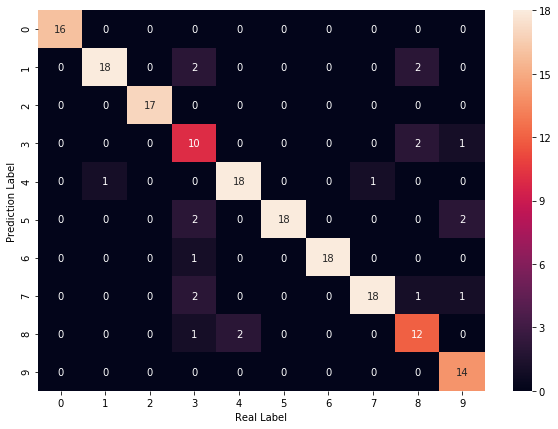

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([16., 22., 17., 13., 20., 22., 19., 22., 15., 14.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:132 index:[5] real:5
#1 min_error:151 index:[2] real:2
#2 min_error:161 index:[1] real:8
#3 min_error:40 index:[0] real:0
#4 min_error:120 index:[1] real:1
#5 min_error:111 index:[7] real:7
#6 min_error:63 index:[6] real:6
#7 min_error:116 index:[3] real:3
#8 min_error:78 index:[2] real:2
#9 min_error:123 index:[1] real:1
#10 min_error:154 index:[7] real:7
#11 min_error:173 index:[8] real:4
#12 min_error:84 index:[6] real:6
#13 min_error:118 index:[3] real:3
#14 min_error:115 index:[1] real:1
#15 min_error:151 index:[3] real:3
#16 min_error:158 index:[7] real:9
#17 min_error:108 index:[1] real:1
#18 min_error:159 index:[7] real:7
#19 min_error:55 index:[6] real:6
#20 min_error:157 index:[8] real:8
#21 min_error:90 index:[4] real:4
#22 min_error:113 index:[3] real:3
#23 min_error:128 index:[1] real:1
#24 min_error:87 index:[4] real:4
#25 min_error:66 index:[0] real:0
#26 min_error:98 index:[5] real:5
#27 min_error:101 index:[3] real:3
#28 min_error:142 index:[6] real:6
#29 

In [24]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:8666 Total connections::8571


In [26]:
necoc = 511
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9010513296227582
Avg Base Learner:0.7827014100427576
